<a href="https://colab.research.google.com/github/pagarsky/nn2022/blob/master/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторна робота №4
### з дисципліни "Нейронні мережі"
### студента групи КН-31/2
### Пагарського Олексія
### Варіант №7

In [ ]:
import random
import itertools

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### На основі документу вирішити завдання класифікації для набору даних Fashion MNIST.
Для моделювання використати 3 класи індекси яких взяти відповідно до номеру у списку групи.
Моделювання провести із використанням нейронної мережі (Flatten & Dense layers).
Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix.


In [ ]:
indices = set([6, 9, 3])  # Shirt, Ankle boot, Dress
_map = {6: 0, 9: 1, 3: 2}

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
train_data_filtered = np.array([[img, _map[label]] for img, label in zip(train_data, train_labels) if label in indices])
test_data_filtered = np.array([[img, _map[label]] for img, label in zip(test_data, test_labels) if label in indices])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
train_data, train_labels = train_data_filtered[:, 0], train_data_filtered[:, 1]
test_data, test_labels = test_data_filtered[:, 0], test_data_filtered[:, 1]

2


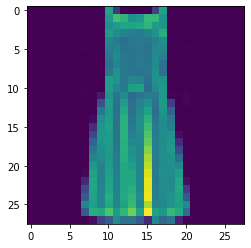

In [ ]:
print(train_labels[7])
plt.imshow(train_data[7])

In [ ]:
train_data = np.array([*train_data])
test_data = np.array([*test_data])
train_data.shape

(18000, 28, 28)

In [ ]:
train_data = (train_data / 255.0)
test_data = (test_data / 255.0)
train_labels = train_labels.astype(np.int32)
test_labels = test_labels.astype(np.int32)

In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((18000, 28, 28), (18000,), (3000, 28, 28), (3000,))

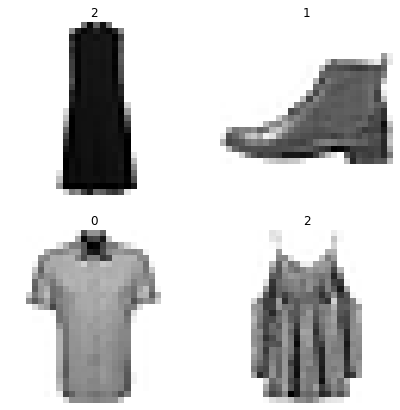

In [ ]:
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(train_labels[rand_index])
  plt.axis(False)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(4, activation="relu"),
tf.keras.layers.Dense(4, activation="relu"),
tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["acc"]
)

In [ ]:
model.fit(
    train_data,
    train_labels,
    epochs=10,
    callbacks=[tf.keras.callbacks.EarlyStopping('val_acc', patience=3)],
    validation_data=[test_data, test_labels]
)

Epoch 1/10
563/563 [==============================] - 3s 4ms/step - loss: 0.5561 - acc: 0.7852 - val_loss: 0.1711 - val_acc: 0.9457
Epoch 2/10
563/563 [==============================] - 2s 4ms/step - loss: 0.1301 - acc: 0.9549 - val_loss: 0.1542 - val_acc: 0.9483
Epoch 3/10
563/563 [==============================] - 2s 4ms/step - loss: 0.1144 - acc: 0.9592 - val_loss: 0.1476 - val_acc: 0.9500
Epoch 4/10
563/563 [==============================] - 2s 4ms/step - loss: 0.1076 - acc: 0.9623 - val_loss: 0.1394 - val_acc: 0.9497
Epoch 5/10
563/563 [==============================] - 2s 4ms/step - loss: 0.1028 - acc: 0.9641 - val_loss: 0.1358 - val_acc: 0.9543
Epoch 6/10
563/563 [==============================] - 2s 4ms/step - loss: 0.1002 - acc: 0.9643 - val_loss: 0.1325 - val_acc: 0.9553
Epoch 7/10
563/563 [==============================] - 2s 4ms/step - loss: 0.0973 - acc: 0.9639 - val_loss: 0.1375 - val_acc: 0.9553
Epoch 8/10
563/563 [==============================] - 2s 4ms/step - loss: 0.

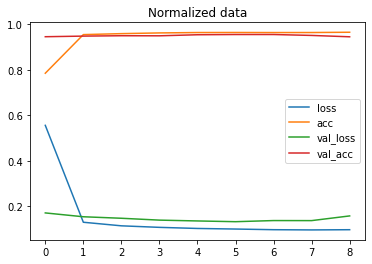

In [ ]:
pd.DataFrame(model.history.history).plot(title="Normalized data")

### make_confusion_matrix

In [ ]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

###_

In [ ]:
y_probs = model.predict(test_data)
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([1, 0, 0, 2, 1, 0, 1, 0, 2, 2])

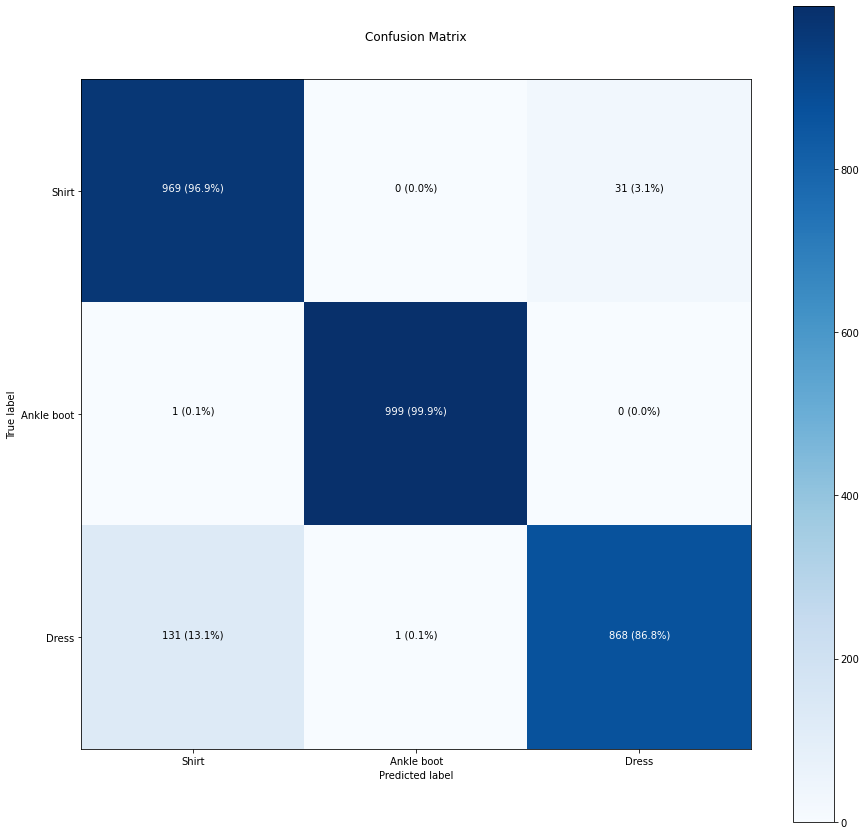

In [ ]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=['Shirt', 'Ankle boot', 'Dress'],
                      figsize=(15, 15),
                      text_size=10)


## Висновок
Для виконання класифікації картинок одягу ми використали повнозв'язну нейронну мережу, навчили на вибраних відповідно до варіанту класах, отримавши точність ~96%, та візуалізували confusion_matrix для даної моделі.